<a href="https://colab.research.google.com/github/carlo-coding/curso_deep_learning/blob/main/Red_Neuronal_desde_Cero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primero creamos el dataset

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

x shape (500, 2)
y shape (500, 1)


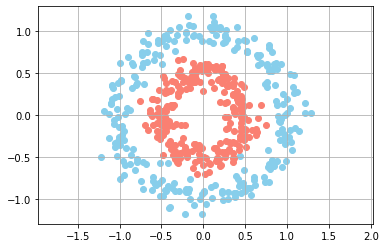

In [194]:
p = 2 # Clases
n = 500 # Cantidad de datos

x, y = make_circles(n_samples=n, factor=.5, noise=.1)

y = np.reshape(y, (y.shape[0], 1))

print("x shape", x.shape)
print("y shape", y.shape)
plt.scatter(x[y[:, 0] == 0, 0], x[y[:, 0] == 0, 1], c="skyblue")
plt.scatter(x[y[:, 0] == 1, 0], x[y[:, 0] == 1, 1], c="salmon")
plt.axis("equal")
plt.grid()
plt.show()

Creamos una clase para inicializar los pesos y bias en base a las conecciones y el número de neuronas con valores aleatorios entre -1 y 1

In [196]:
class NeuralLayer():
  def __init__(self, n_connections, n_neurons):
    self.w = np.random.rand(n_connections, n_neurons)*2 - 1
    self.b = np.random.rand(1, n_neurons)*2 - 1

# Capa anterior: 8 neuronas
# Capa actual: 16 neuronas
layer_example = NeuralLayer(8, 16)
print("weights shape: ", layer_example.w.shape)
print("biases shape: ", layer_example.b.shape)

weights shape:  (8, 16)
biases shape:  (1, 16)


Creamos la función de activación, la función de coste y sus derivadas

In [205]:
cost_function = lambda Yr, Yp: np.mean((Yr - Yp)**2)
cost_derivative = lambda Yr, Yp: 2*(Yp - Yr)

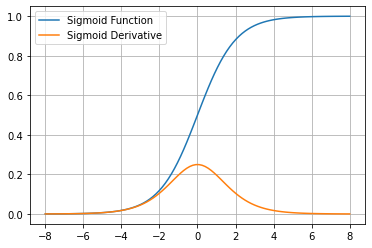

In [203]:
sigmoid = lambda x: 1/(1 + np.e**(-x))

sigmoid_derivative = lambda x: sigmoid(x)*(1 - sigmoid(x))

_x = np.linspace(-8, 8, 100)

plt.plot(_x, sigmoid(_x))
plt.plot(_x, sigmoid_derivative(_x))
plt.legend(["Sigmoid Function", "Sigmoid Derivative"])
plt.grid()
plt.show()

Creamos una función para componer las capas de la red

In [209]:
def create_neural_network(topology):
  nn = []
  for i in range(len(topology[:-1])):
    nn.append(NeuralLayer(topology[i], topology[i+1]))
  return nn

topology = [p, 4, 16, 4, 1]
nn = create_neural_network(topology)
for i, layer in enumerate(nn):
  print(f"Layer {i+1}")
  print("weights shape: ", layer.w.shape)
  print("biases shape: ", layer.b.shape)

Layer 1
weights shape:  (2, 4)
biases shape:  (1, 4)
Layer 2
weights shape:  (4, 16)
biases shape:  (1, 16)
Layer 3
weights shape:  (16, 4)
biases shape:  (1, 4)
Layer 4
weights shape:  (4, 1)
biases shape:  (1, 1)


Creamos una función para entrenar a la red 

In [233]:
def train(neural_network, x, y, lr=0.01, train=True):
  # Primero hacemos un forward pass guardando tanto las suma ponderadas como las activaciones
  z = [None]
  a = [x]

  for i, layer in enumerate(neural_network):
    result = a[-1] @ layer.w + layer.b # Suma ponderada de la salida de la última capa 
    activation = sigmoid(result)       # Activación sigmoide de la última capa
    z.append(result)
    a.append(activation)

  # En caso de que queramos entrenar
  if train:
    deltas = []
    # Recorremos la red desde atras
    for i in reversed(range(len(neural_network))): 
      # En caso de que estemos en la última capa la delta es la derivada de la función de coste 
      # por la derivada de la función de activación
      if i == len(neural_network) - 1:
        # Usamos i+1 porque tanto a como z tienen la longitud de la red + 1  
        deltas.append(cost_derivative(y, a[i+1]) * sigmoid_derivative(z[i+1]))
      # Delta es igual a la última delta por la matriz de pesos de la iteración anterior
      # por la derivada de la sigmoide
      else:
        deltas.append(deltas[-1] @ _W.T * sigmoid_derivative(z[i+1]))

      # Esta variable va a estar atrasada una iteración con respecto al cálculo de las deltas
      _W = neural_network[i].w

      # Actualizamos los pesos
      neural_network[i].b = neural_network[i].b - np.mean(deltas[-1], axis=0, keepdims=True) * lr
      neural_network[i].w = neural_network[i].w - a[i].T @ deltas[-1] * lr

  return a[-1]


In [286]:
import time
from IPython.display import clear_output

def animated_training(neural_network, x, y, lr, epochs, boundaries = (-1.5, 1.5)):
  loss = []

  for i in range(epochs):
    pY = train(neural_network, x, y, lr)

    if i % 25 == 0:
      loss.append(cost_function(pY, y))
      res = 50
      _x0 = np.linspace(boundaries[0], boundaries[1], res)
      _x1 = np.linspace(boundaries[0], boundaries[1], res)

      _Y = np.zeros((res, res))

      for i0, x0 in enumerate(_x0):
        for i1, x1 in enumerate(_x1):
          _Y[i0, i1] = train(neural_network, np.array([[x0, x1]]), y, cost_function, train=False)[0][0]

      plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
      plt.axis("equal")

      plt.scatter(x[y[:,0] == 0, 0], x[y[:,0] == 0, 1], c="skyblue")
      plt.scatter(x[y[:,0] == 1, 0], x[y[:,0] == 1, 1], c="salmon")

      clear_output(wait=True)
      plt.title(f"Epoch: {i+1}")
      plt.grid()
      plt.show()
      
      plt.title(f"Error: {loss[-1]}")
      plt.plot(range(len(loss)), loss)
      plt.show()

      time.sleep(0.1)




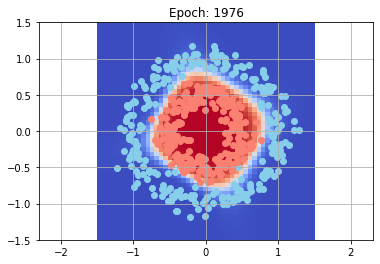

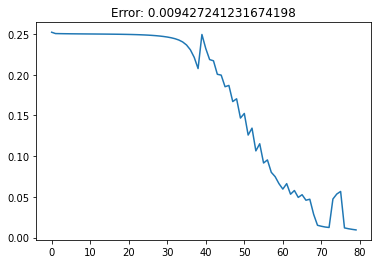

In [289]:
topology = [p, 4, 32, 4, 1]
neural_network = create_neural_network(topology)
animated_training(neural_network, x, y, lr=0.005, epochs=2000)